In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('C:/Sonu/Dissertation_Final_Project/Deliverables/Dissertation_Report/Submission_Folder/Pod_Fault_Data_CSV/PF_Memory_Node_VsPod-Backend.csv')
df.head(10)



Mem_Node_Backend  Mem_Pod_Backend
0          14909440         14962688
1          14909440         15216640
2          14868480         14544896
3          14868480         15564800
4          14913536         30425088
5          15020032         15314944
6          15192064         14057472
7          15380480         14491648
8          15237120         14336000
9          14888960         14336000

In [2]:
# Standardization of Variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=['Mem_Node_Backend','Mem_Pod_Backend'])

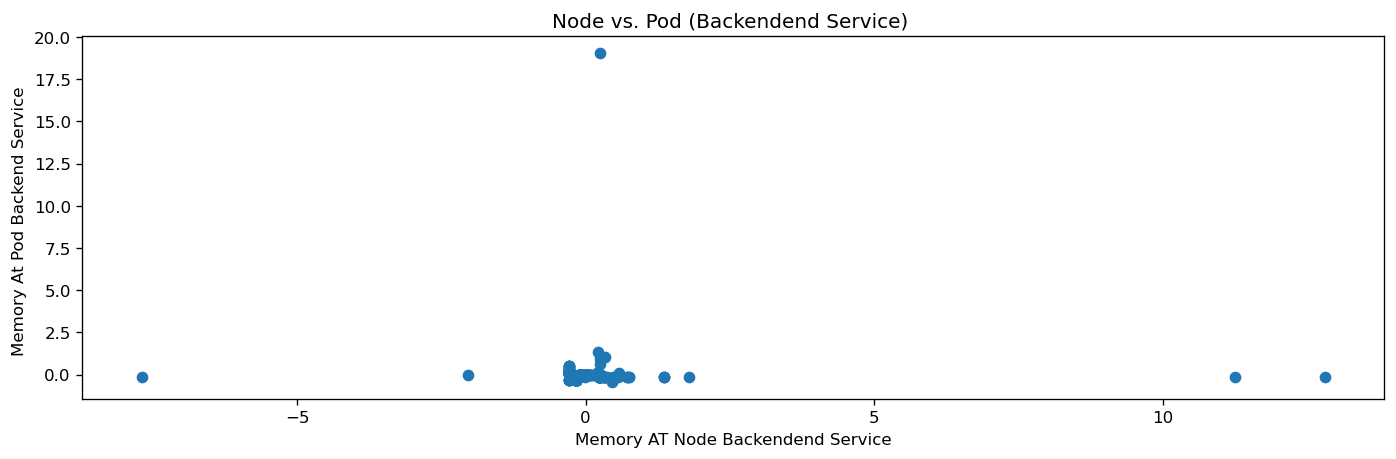

In [3]:
plt.figure(figsize=(14,4))
plt.scatter(df.Mem_Node_Backend, df.Mem_Pod_Backend)
plt.xlabel('Memory AT Node Backendend Service')
plt.ylabel('Memory At Pod Backend Service ')
plt.title('Node vs. Pod (Backendend Service) ')
plt.show()

In [4]:
# K=3 , cause of natural sub clustering and only two features in considaration.Variable fitting to the model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(df)

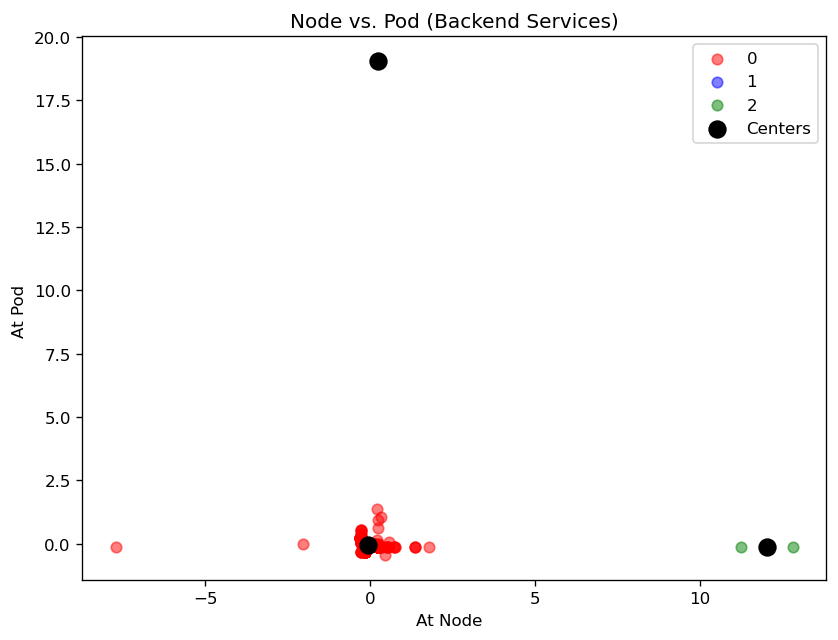

In [5]:
colors=["red","blue","green","orange"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].Mem_Node_Backend, df[model.labels_==i].Mem_Pod_Backend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Memory Data",size=20)
plt.xlabel("At Node  ")
plt.ylabel("At Pod ")
plt.title('Node vs. Pod (Backend Services)')
plt.legend()
plt.show()

In [6]:
def distance_from_center(Mem_Node_Backend, Mem_Pod_Backend, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
    :param float Node memory Usage: the standardized Memory Usage of the data point 
    :param float Pod Memory Usage: the standardized Memory at Pod of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    Node_Back_Mem =  model.cluster_centers_[label,0]
    Pod_Mem_Backend =  model.cluster_centers_[label,1]
    distance = np.sqrt((Mem_Node_Backend - Node_Back_Mem) ** 2 + (Mem_Pod_Backend - Pod_Mem_Backend) ** 2)
    return np.round(distance, 2)
df['label'] = model.labels_
df['distance'] = distance_from_center(df.Mem_Node_Backend, df.Mem_Pod_Backend, df.label)

In [7]:
# Sorting datafram to find the top outliers
outliers_idx = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outliers_idx)]
print(outliers)

     Mem_Node_Backend  Mem_Pod_Backend  label  distance
1            0.247698         0.934636      0      1.03
3            0.218496         1.349711      0      1.43
5            0.326542         1.051834      0      1.17
56           0.752884        -0.125023      0      0.82
59           1.792458        -0.125023      0      1.86
60           1.354435        -0.125023      0      1.42
61           1.354435        -0.125023      0      1.42
62           1.354435        -0.125023      0      1.42
63          -7.698033        -0.125023      0      7.63
215         -2.044621         0.001940      0      1.98


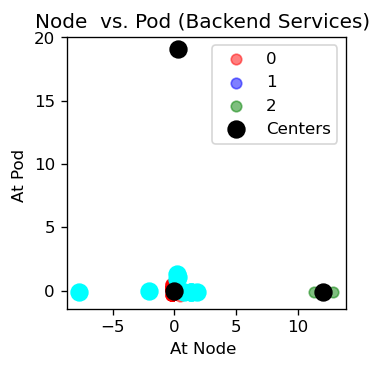

In [9]:
# figure setting
plt.figure(figsize=(3,3))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df[model.labels_==i].Mem_Node_Backend, df[model.labels_==i].Mem_Pod_Backend, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.Mem_Node_Backend, outliers.Mem_Pod_Backend, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of CPU Data",size=20)
plt.xlabel("At Node ")
plt.ylabel("At Pod ")
plt.title('Node  vs. Pod (Backend Services) ')
plt.legend()
plt.show()